# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

#Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


#Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.



#You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


#Dataset Attributes
Here is the description of all the variables:

•	Variable: Definition

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign

Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



#Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('termdeposit_train.csv')
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
test_df=pd.read_csv('termdeposit_test.csv')
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


# EDA

In [4]:
print(f'Shape of training data:{train_df.shape}')
print(f'Shape of test data:{test_df.shape}')

Shape of training data:(31647, 18)
Shape of test data:(13564, 17)


In [5]:
print(f'columns of training data:{train_df.columns}')
print(f'columns of test data:{test_df.columns}')

columns of training data:Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')
columns of test data:Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [6]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
Ra

In [7]:
# null values
missing_val = train_df.isnull().sum().to_frame("Null values")

missing_val

,Null values
ID,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [8]:
# null values
missing_val = test_df.isnull().sum().to_frame("Null values")

missing_val

,Null values
ID,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


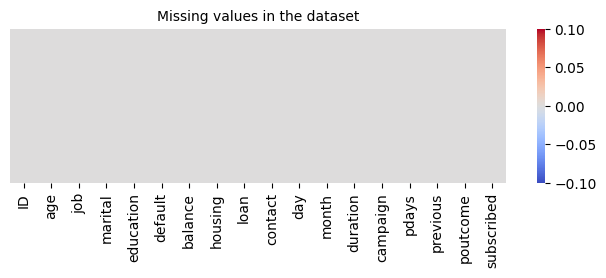

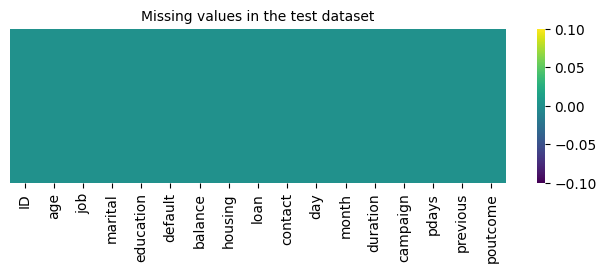

In [9]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(8,2))
sns.heatmap(train_df.isnull(), yticklabels=False, cmap='coolwarm')
plt.title('Missing values in the dataset', fontsize=10);

# Lets visualize it using heatmap for test dataset
plt.figure(figsize=(8,2))
sns.heatmap(test_df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing values in the test dataset', fontsize=10);

In [10]:
# number of unique values and data types in the training dataset
train_info_train_df = train_df.nunique().to_frame('Train No. of unique values')
train_info_train_df['Train Type'] = train_df.dtypes.values

# number of unique values and data types in the test dataset
test_info_train_df = test_df.nunique().to_frame('Test No. of unique values')
test_info_train_df['Test Type'] = test_df.dtypes.values

combined_info_train_df = train_info_train_df.join(test_info_train_df)
combined_info_train_df

,Train No. of unique values,Train Type,Test No. of unique values,Test Type
ID,31647,int64,13564.0,int64
age,76,int64,75.0,int64
job,12,object,12.0,object
marital,3,object,3.0,object
education,4,object,4.0,object
default,2,object,2.0,object
balance,6326,int64,4292.0,int64
housing,2,object,2.0,object
loan,2,object,2.0,object
contact,3,object,3.0,object


In [11]:
#we will remove the ID colummn because it serves no purpose in the data modelling
print('Train dataset')
train_df.drop(['ID'], axis=1, inplace=True)
display(train_df.sample(5))

print('Test dataset')
test_df.drop(['ID'], axis=1, inplace=True)
display(test_df.sample(5))

Train dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
4280,22,student,single,secondary,no,722,yes,no,cellular,2,apr,108,1,-1,0,unknown,no
16433,39,management,married,tertiary,yes,-1586,yes,yes,cellular,16,jul,89,2,-1,0,unknown,no
8423,52,blue-collar,married,secondary,no,2276,no,no,unknown,20,jun,83,3,-1,0,unknown,no
30966,40,management,married,tertiary,no,2840,yes,no,cellular,8,jul,1720,4,-1,0,unknown,no
22296,37,admin.,single,tertiary,no,1000,yes,no,cellular,15,jun,322,1,90,1,success,yes


Test dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13349,38,services,divorced,primary,no,0,yes,no,cellular,20,apr,355,3,151,3,failure
10118,63,technician,married,secondary,no,973,no,no,cellular,25,feb,318,1,388,1,success
173,47,blue-collar,married,secondary,yes,-614,yes,no,unknown,26,may,118,2,-1,0,unknown
2755,32,blue-collar,single,secondary,no,400,no,no,cellular,4,may,268,3,-1,0,unknown
7618,31,management,single,tertiary,no,2227,no,no,cellular,14,aug,95,2,-1,0,unknown


In [12]:
#new shape
print(f'Shape of training data:{train_df.shape}')
print(f'Shape of test data:{test_df.shape}')

Shape of training data:(31647, 17)
Shape of test data:(13564, 16)


In [13]:
# Checking the target variable
train_df['subscribed'].value_counts().to_frame()

,count
subscribed,
no,27932
yes,3715


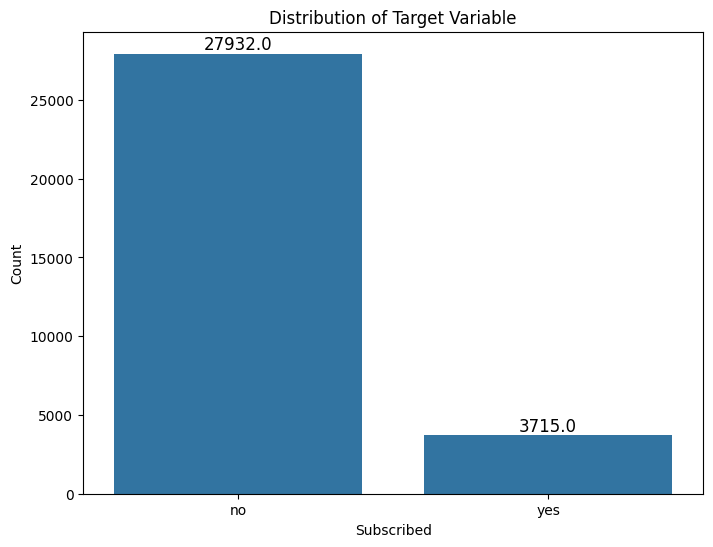

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='subscribed')
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Target Variable')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()


# Imbalanced data

In [15]:
#Separating the catagorical and numerical columns

cat_col = []
num_col = []

for i in train_df.dtypes.index:
    if train_df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(f"Categorical Columns: {cat_col}")
print(f"Numerical Columns: {num_col}")

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [16]:
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
# duplicated values
train_df[train_df.duplicated()].shape

(0, 17)

# Data Visualisation

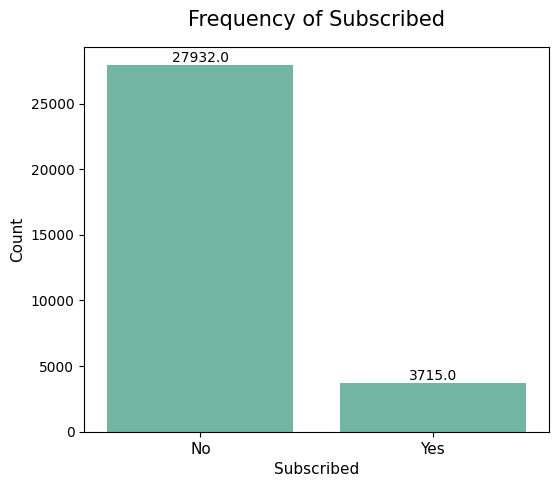

,count
subscribed,
no,27932
yes,3715


In [18]:
# Subcribers frequency
def add_counts(ax):
    for p in ax.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}', (x, y), ha='center', va='bottom', fontsize=10, color='black')

sns.set_palette('Set2')

plt.figure(figsize=(6, 5))
ax = sns.countplot(x='subscribed', data=train_df)
add_counts(ax)

ax.set_xlabel('Subscribed', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.set_xticklabels(['No', 'Yes'], fontsize=11)
ax.set_title('Frequency of Subscribed', fontsize=15, pad=15)

# Display the plot
plt.show()
train_df['subscribed'].value_counts().to_frame()


In [19]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

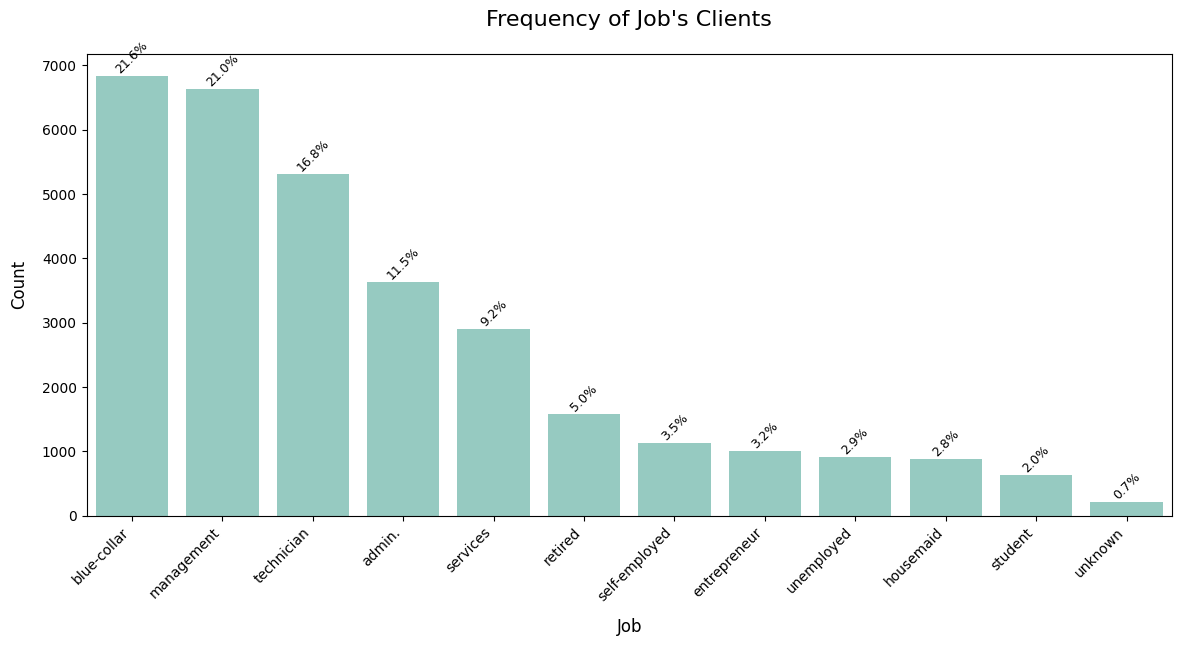

,proportion
job,
blue-collar,0.216197
management,0.209783
technician,0.167694
admin.,0.114734
services,0.091731
retired,0.049736
self-employed,0.035485
entrepreneur,0.031851
unemployed,0.028597


In [20]:
#Job frequency
def add_percentage(ax, total):
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=9, color='black', rotation=45)

sns.set_palette('Set3')

plt.figure(figsize=(14, 6))
ax = sns.countplot(x='job', data=train_df, order=train_df['job'].value_counts().index)

add_percentage(ax, len(train_df))

ax.set_xlabel('Job', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_title('Frequency of Job\'s Clients', fontsize=16, pad=20)

# Display the plot
plt.show()
train_df['job'].value_counts(normalize=True).to_frame()


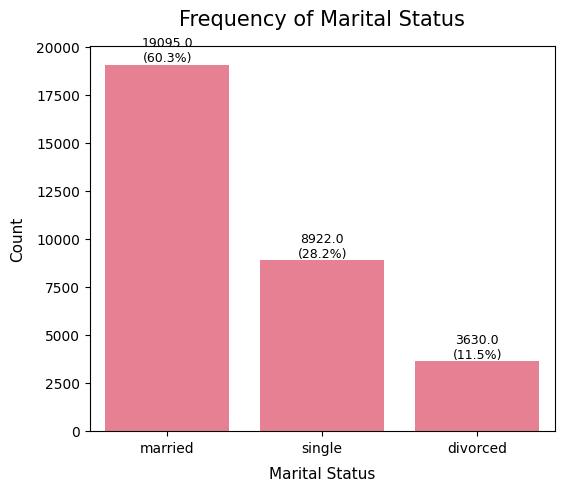

,count
marital,
married,19095
single,8922
divorced,3630


In [21]:
def add_counts_with_percentage(ax, total):
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=9, color='black')

sns.set_palette('husl')

plt.figure(figsize=(6, 5))
ax = sns.countplot(x='marital', data=train_df, order=train_df['marital'].value_counts().index)

add_counts_with_percentage(ax, len(train_df))

ax.set_xlabel('Marital Status', fontsize=11, labelpad=8)
ax.set_ylabel('Count', fontsize=11, labelpad=8)
ax.set_title('Frequency of Marital Status', fontsize=15, pad=15)

# Display the plot
plt.show()
train_df['marital'].value_counts().to_frame()


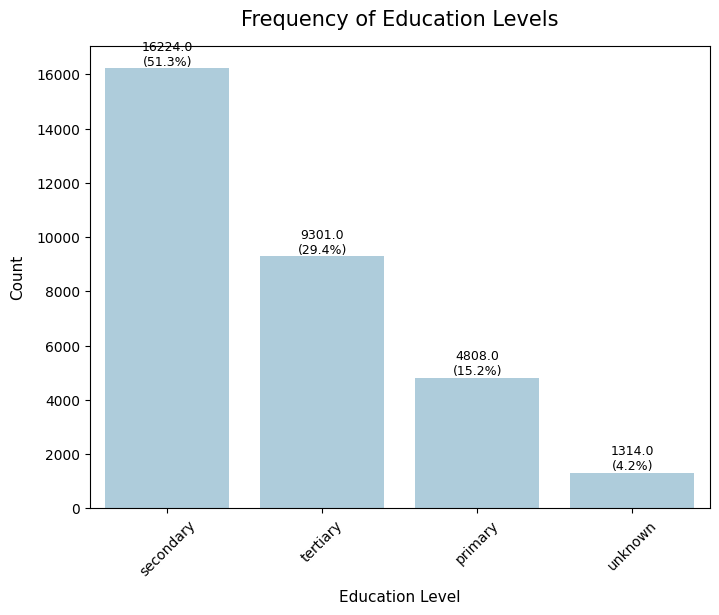

,count
education,
secondary,16224
tertiary,9301
primary,4808
unknown,1314


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_counts_with_percentage(ax, total):
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=9, color='black')

sns.set_palette('Paired')

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='education', data=train_df, order=train_df['education'].value_counts().index)

add_counts_with_percentage(ax, len(train_df))

ax.set_xlabel('Education Level', fontsize=11, labelpad=8)
ax.set_ylabel('Count', fontsize=11, labelpad=8)
ax.set_title('Frequency of Education Levels', fontsize=15, pad=15)

plt.xticks(rotation=45)

# Display the plot
plt.show()
train_df['education'].value_counts().to_frame()

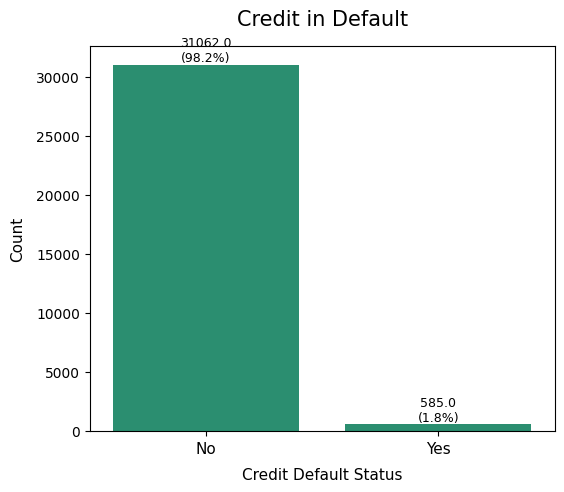

,count
default,
no,31062
yes,585


In [23]:
def add_counts_with_percentage(ax, total):
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=9, color='black')

sns.set_palette('Dark2')

plt.figure(figsize=(6, 5))
ax = sns.countplot(x='default', data=train_df, order=train_df['default'].value_counts().index)

add_counts_with_percentage(ax, len(train_df))

ax.set_xlabel('Credit Default Status', fontsize=11, labelpad=8)
ax.set_ylabel('Count', fontsize=11, labelpad=8)
ax.set_xticklabels(['No', 'Yes'], fontsize=11)
ax.set_title('Credit in Default', fontsize=15, pad=15)

# Display the plot
plt.show()
train_df['default'].value_counts().to_frame()

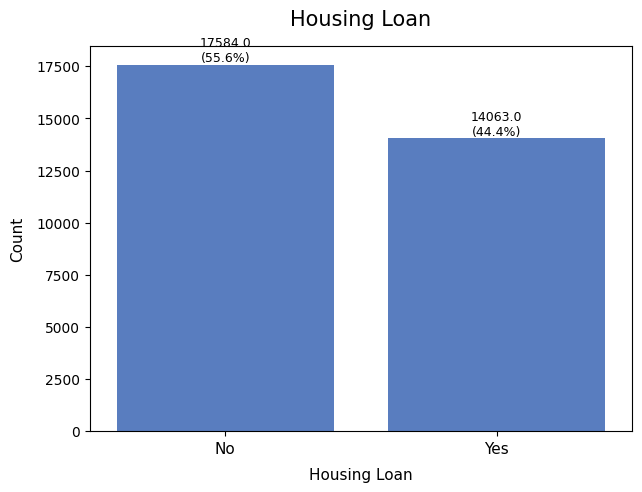

,count
housing,
yes,17584
no,14063


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_counts_with_percentage(ax, total):
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=9, color='black')

sns.set_palette('muted')

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='housing', data=train_df, order=train_df['housing'].value_counts().index)

add_counts_with_percentage(ax, len(train_df))

ax.set_xlabel('Housing Loan', fontsize=11, labelpad=8)
ax.set_ylabel('Count', fontsize=11, labelpad=8)
ax.set_xticklabels(['No', 'Yes'], fontsize=11)
ax.set_title('Housing Loan', fontsize=15, pad=15)

# Display the plot
plt.show()
train_df['housing'].value_counts().to_frame()

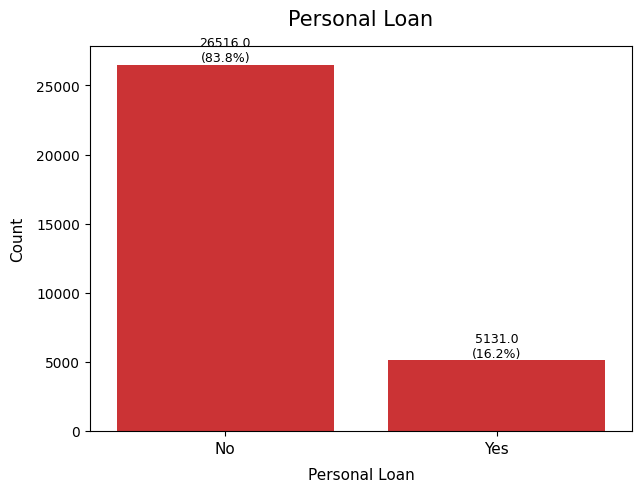

,count
loan,
no,26516
yes,5131


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
def add_counts_with_percentage(ax, total):
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=9, color='black')

sns.set_palette('Set1')

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='loan', data=train_df, order=train_df['loan'].value_counts().index)

add_counts_with_percentage(ax, len(train_df))

ax.set_xlabel('Personal Loan', fontsize=11, labelpad=8)
ax.set_ylabel('Count', fontsize=11, labelpad=8)
ax.set_xticklabels(['No', 'Yes'], fontsize=11)
ax.set_title('Personal Loan', fontsize=15, pad=15)

# Display the plot
plt.show()
train_df['loan'].value_counts().to_frame()


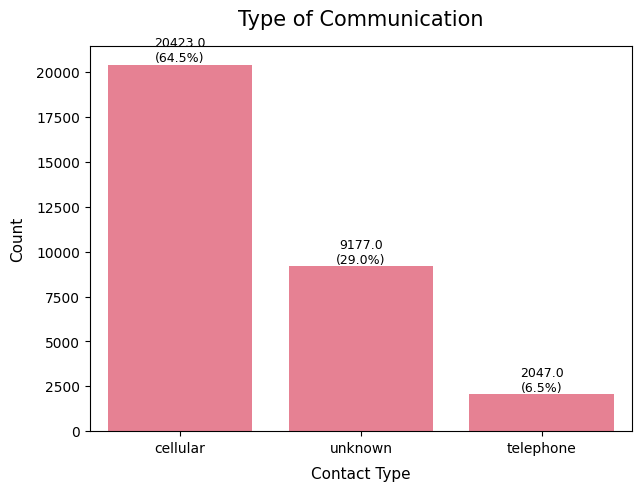

,count
contact,
cellular,20423
unknown,9177
telephone,2047


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_counts_with_percentage(ax, total):
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=9, color='black')

sns.set_palette('husl')

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='contact', data=train_df, order=train_df['contact'].value_counts().index)

add_counts_with_percentage(ax, len(train_df))

ax.set_xlabel('Contact Type', fontsize=11, labelpad=8)
ax.set_ylabel('Count', fontsize=11, labelpad=8)
ax.set_title('Type of Communication', fontsize=15, pad=15)

# Display the plot
plt.show()
train_df['contact'].value_counts().to_frame()


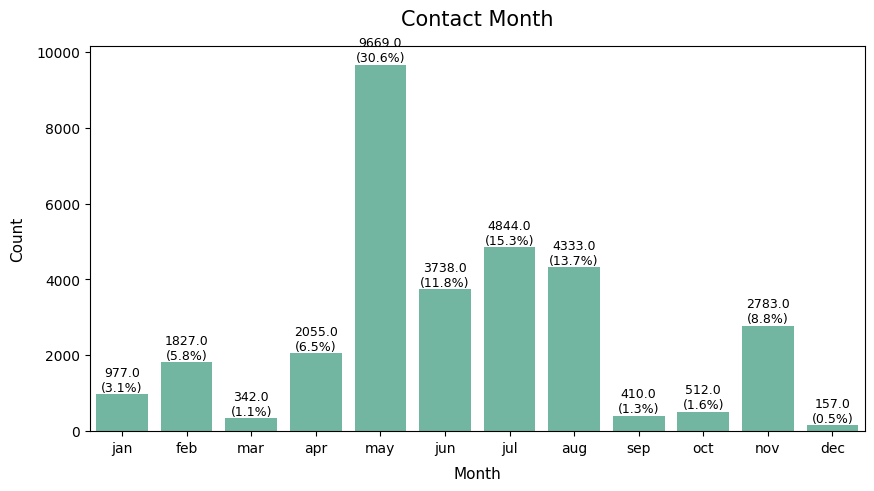

,proportion
month,
may,0.305527
jul,0.153063
aug,0.136917
jun,0.118115
nov,0.087939
apr,0.064935
feb,0.057731
jan,0.030872
oct,0.016178


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
def add_counts_with_percentage(ax, total):
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=9, color='black')

sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='month', data=train_df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

add_counts_with_percentage(ax, len(train_df))

ax.set_xlabel('Month', fontsize=11, labelpad=8)
ax.set_ylabel('Count', fontsize=11, labelpad=8)
ax.set_title('Contact Month', fontsize=15, pad=15)

# Display the plot
plt.show()
train_df['month'].value_counts(normalize=True).to_frame()


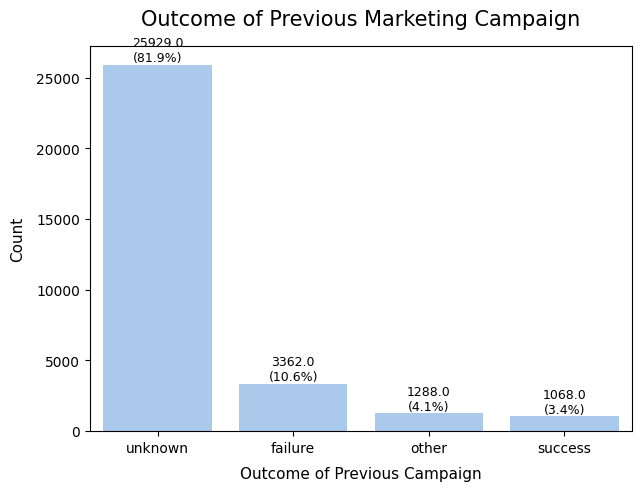

,count
poutcome,
unknown,25929
failure,3362
other,1288
success,1068


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_counts_with_percentage(ax, total):
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=9, color='black')

sns.set_palette('pastel')
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='poutcome', data=train_df, order=train_df['poutcome'].value_counts().index)

add_counts_with_percentage(ax, len(train_df))

ax.set_xlabel('Outcome of Previous Campaign', fontsize=11, labelpad=8)
ax.set_ylabel('Count', fontsize=11, labelpad=8)
ax.set_title('Outcome of Previous Marketing Campaign', fontsize=15, pad=15)

# Display the plot
plt.show()
train_df['poutcome'].value_counts().to_frame()


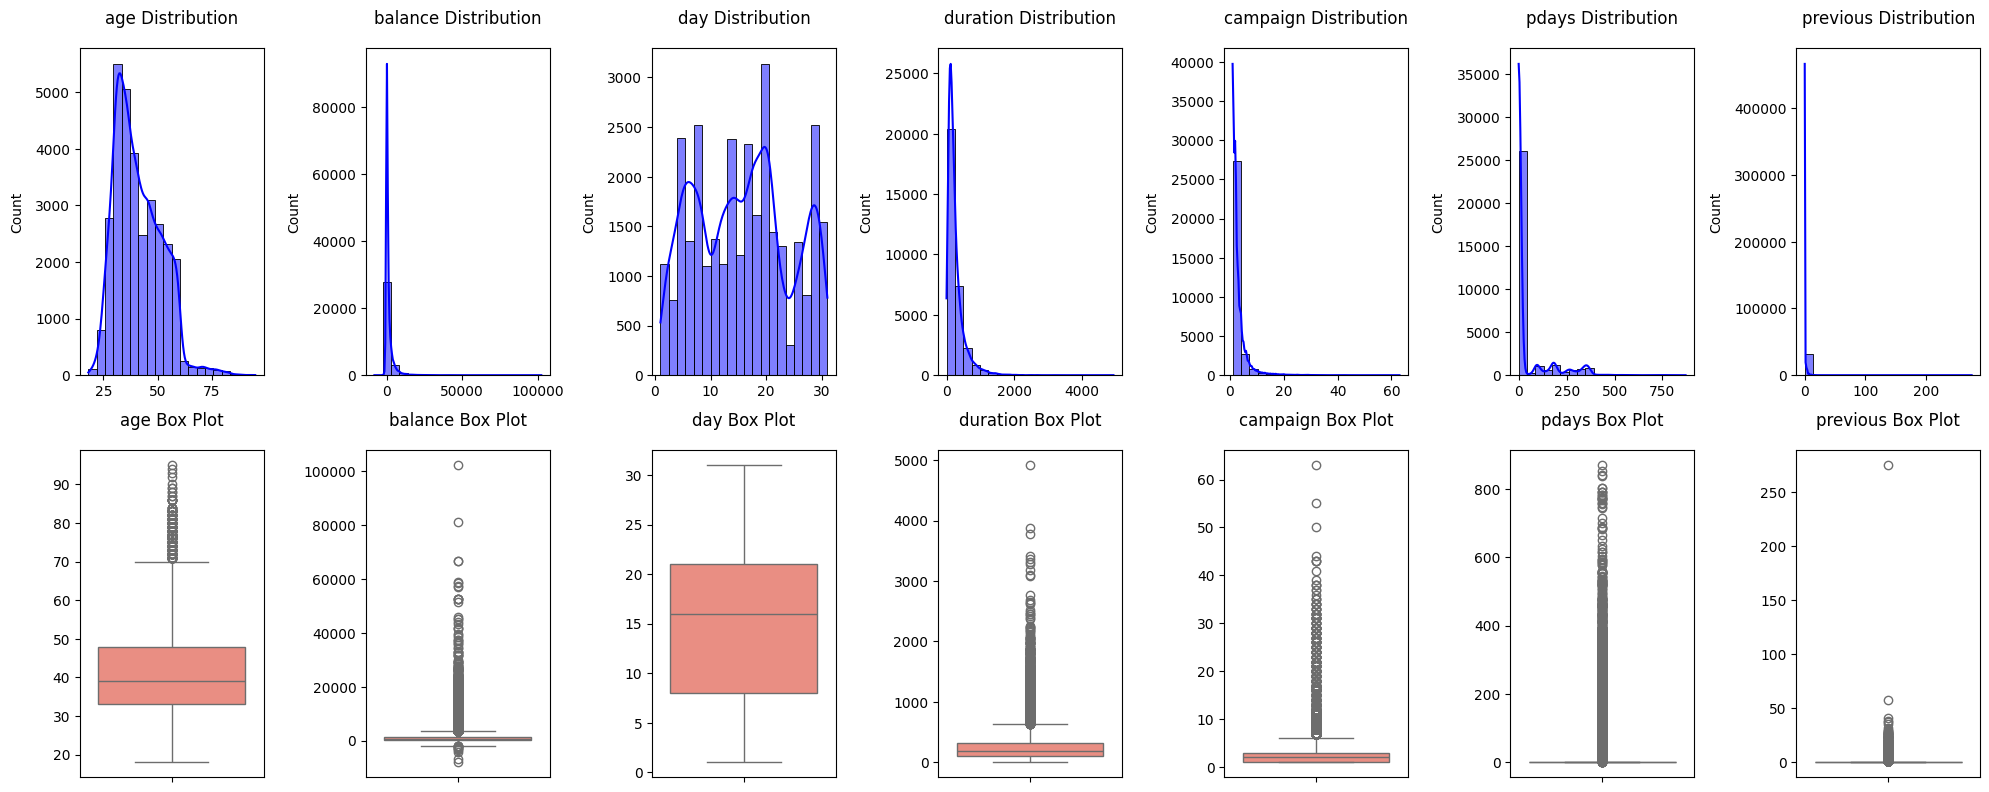

Skewness of age : 0.6816067818884382
Skewness of balance : 7.995695573886313
Skewness of day : 0.08718543483770899
Skewness of duration : 3.1997657339236736
Skewness of campaign : 4.873934933081073
Skewness of pdays : 2.642374162969253
Skewness of previous : 49.30234792386907


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(nrows=2, ncols=len(numerical_cols), figsize=(20, 8))

for i, col in enumerate(numerical_cols):
    # Histogram with KDE
    sns.histplot(train_df[col], kde=True, bins=20, ax=axes[0, i], color='blue')
    axes[0, i].set_title(f'{col} Distribution', size=12, y=1.05)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Count', size=10, labelpad=8)

    # Box plot
    sns.boxplot(train_df[col], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'{col} Box Plot', size=12, y=1.05)
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('')

plt.tight_layout()
plt.show()

# skewness
for col in numerical_cols:
    print(f"Skewness of {col} : {train_df[col].skew()}")


In [30]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

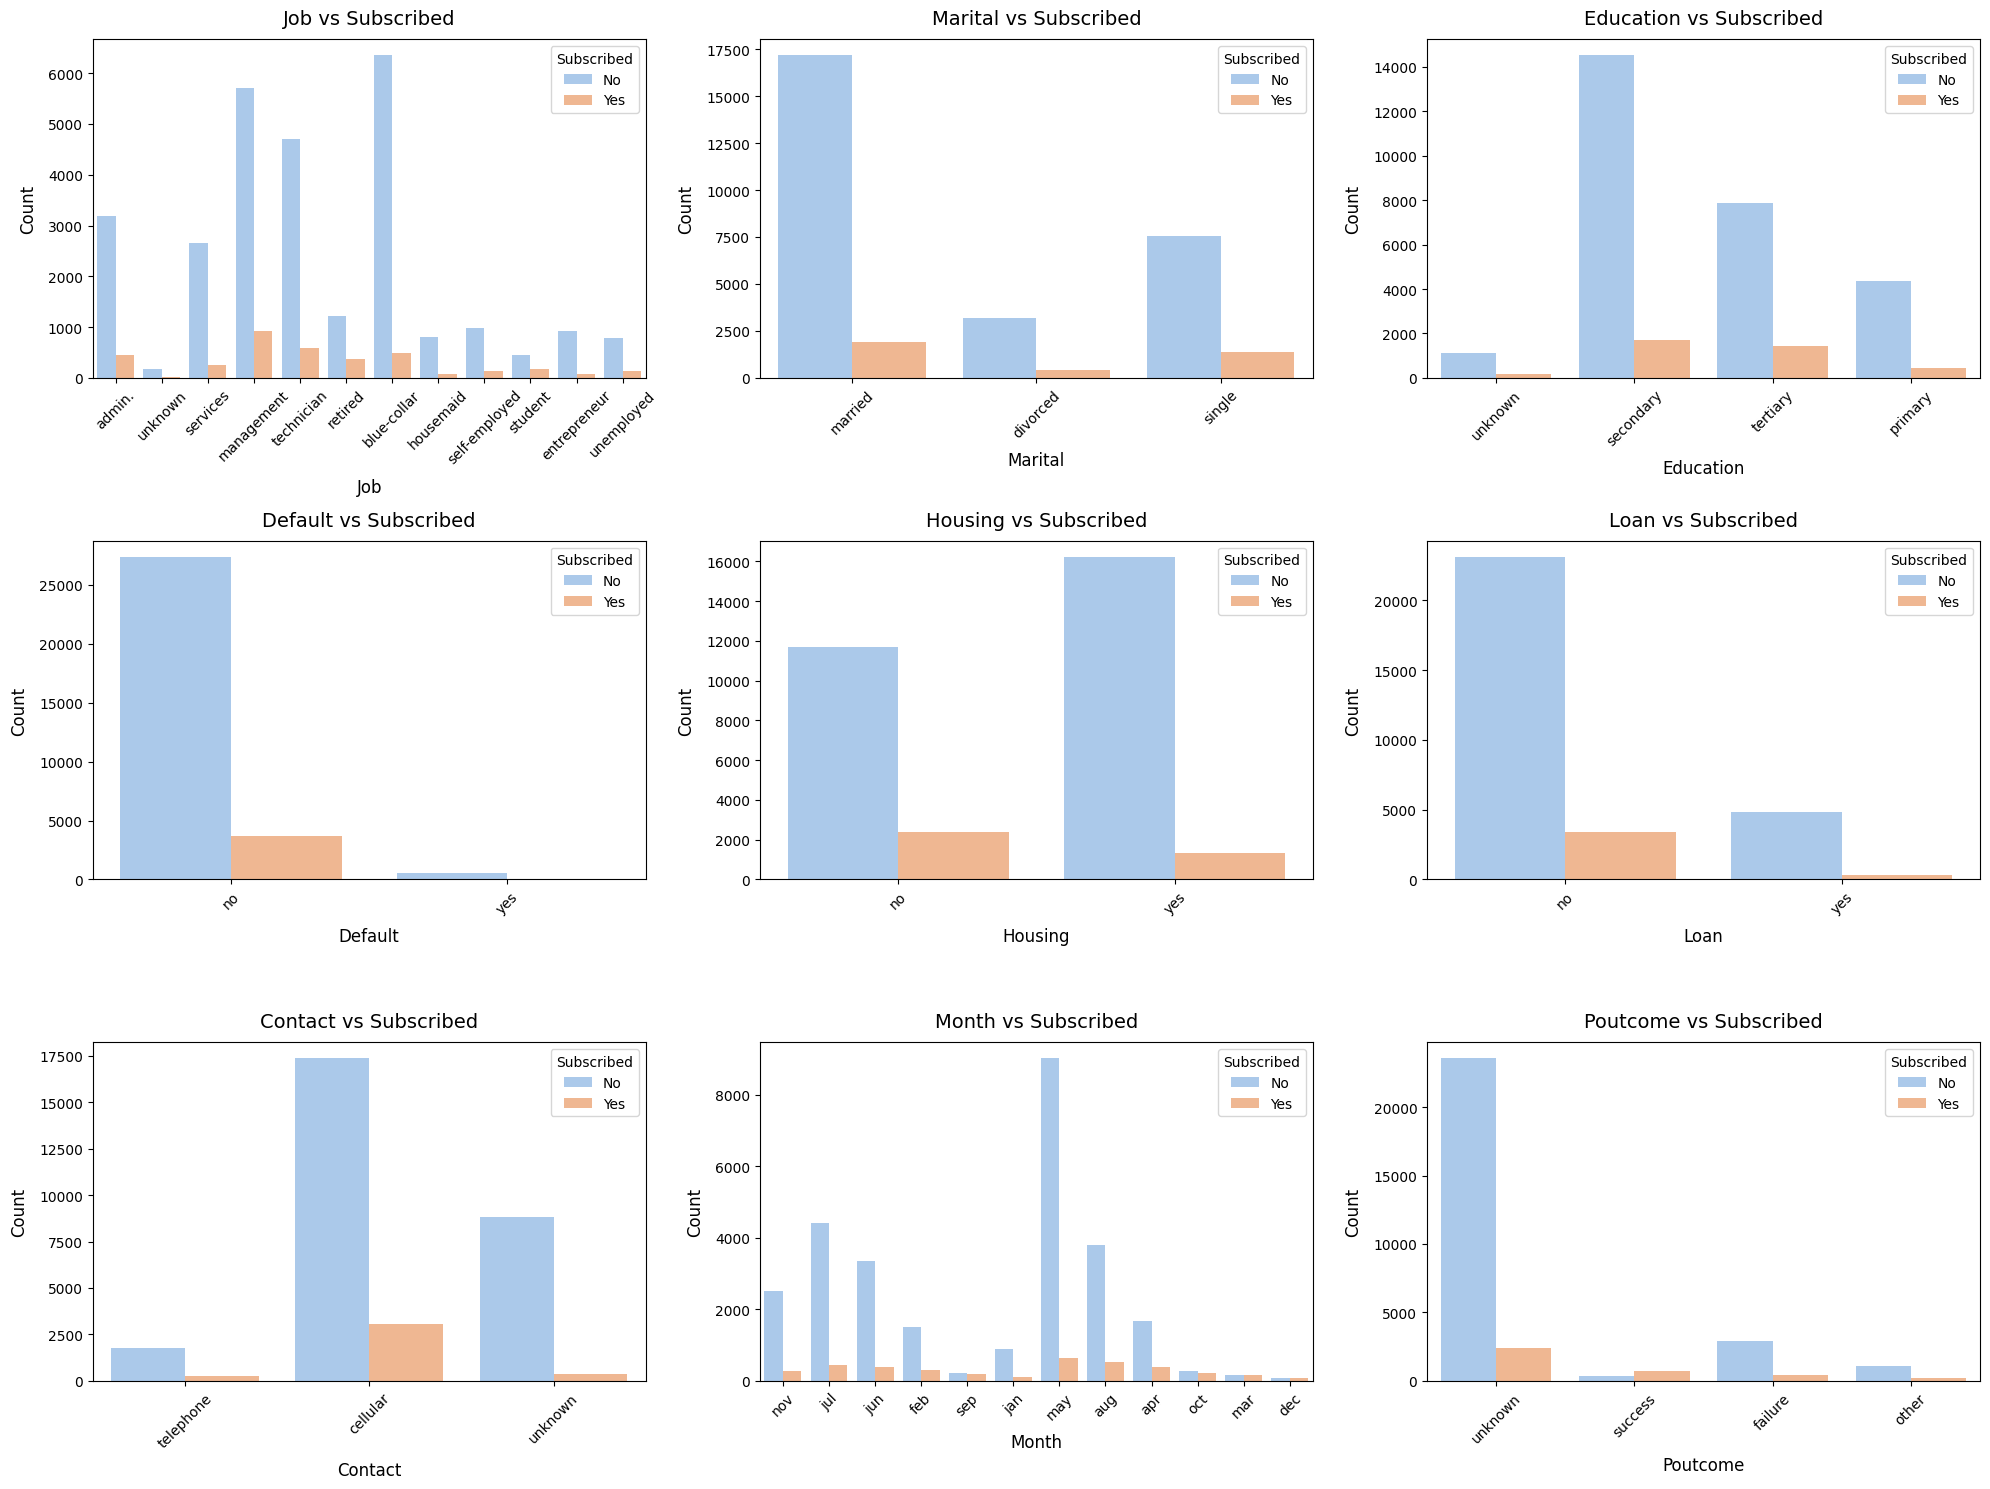

In [31]:
# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Set figure size
plt.figure(figsize=(20, 15))

# Iterate through each categorical column and create subplots
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='subscribed', data=train_df)
    plt.title(f'{col.capitalize()} vs Subscribed', size=14, y=1.02)
    plt.xlabel(f'{col.capitalize()}', size=12, labelpad=8)
    plt.ylabel('Count', size=12, labelpad=8)
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()


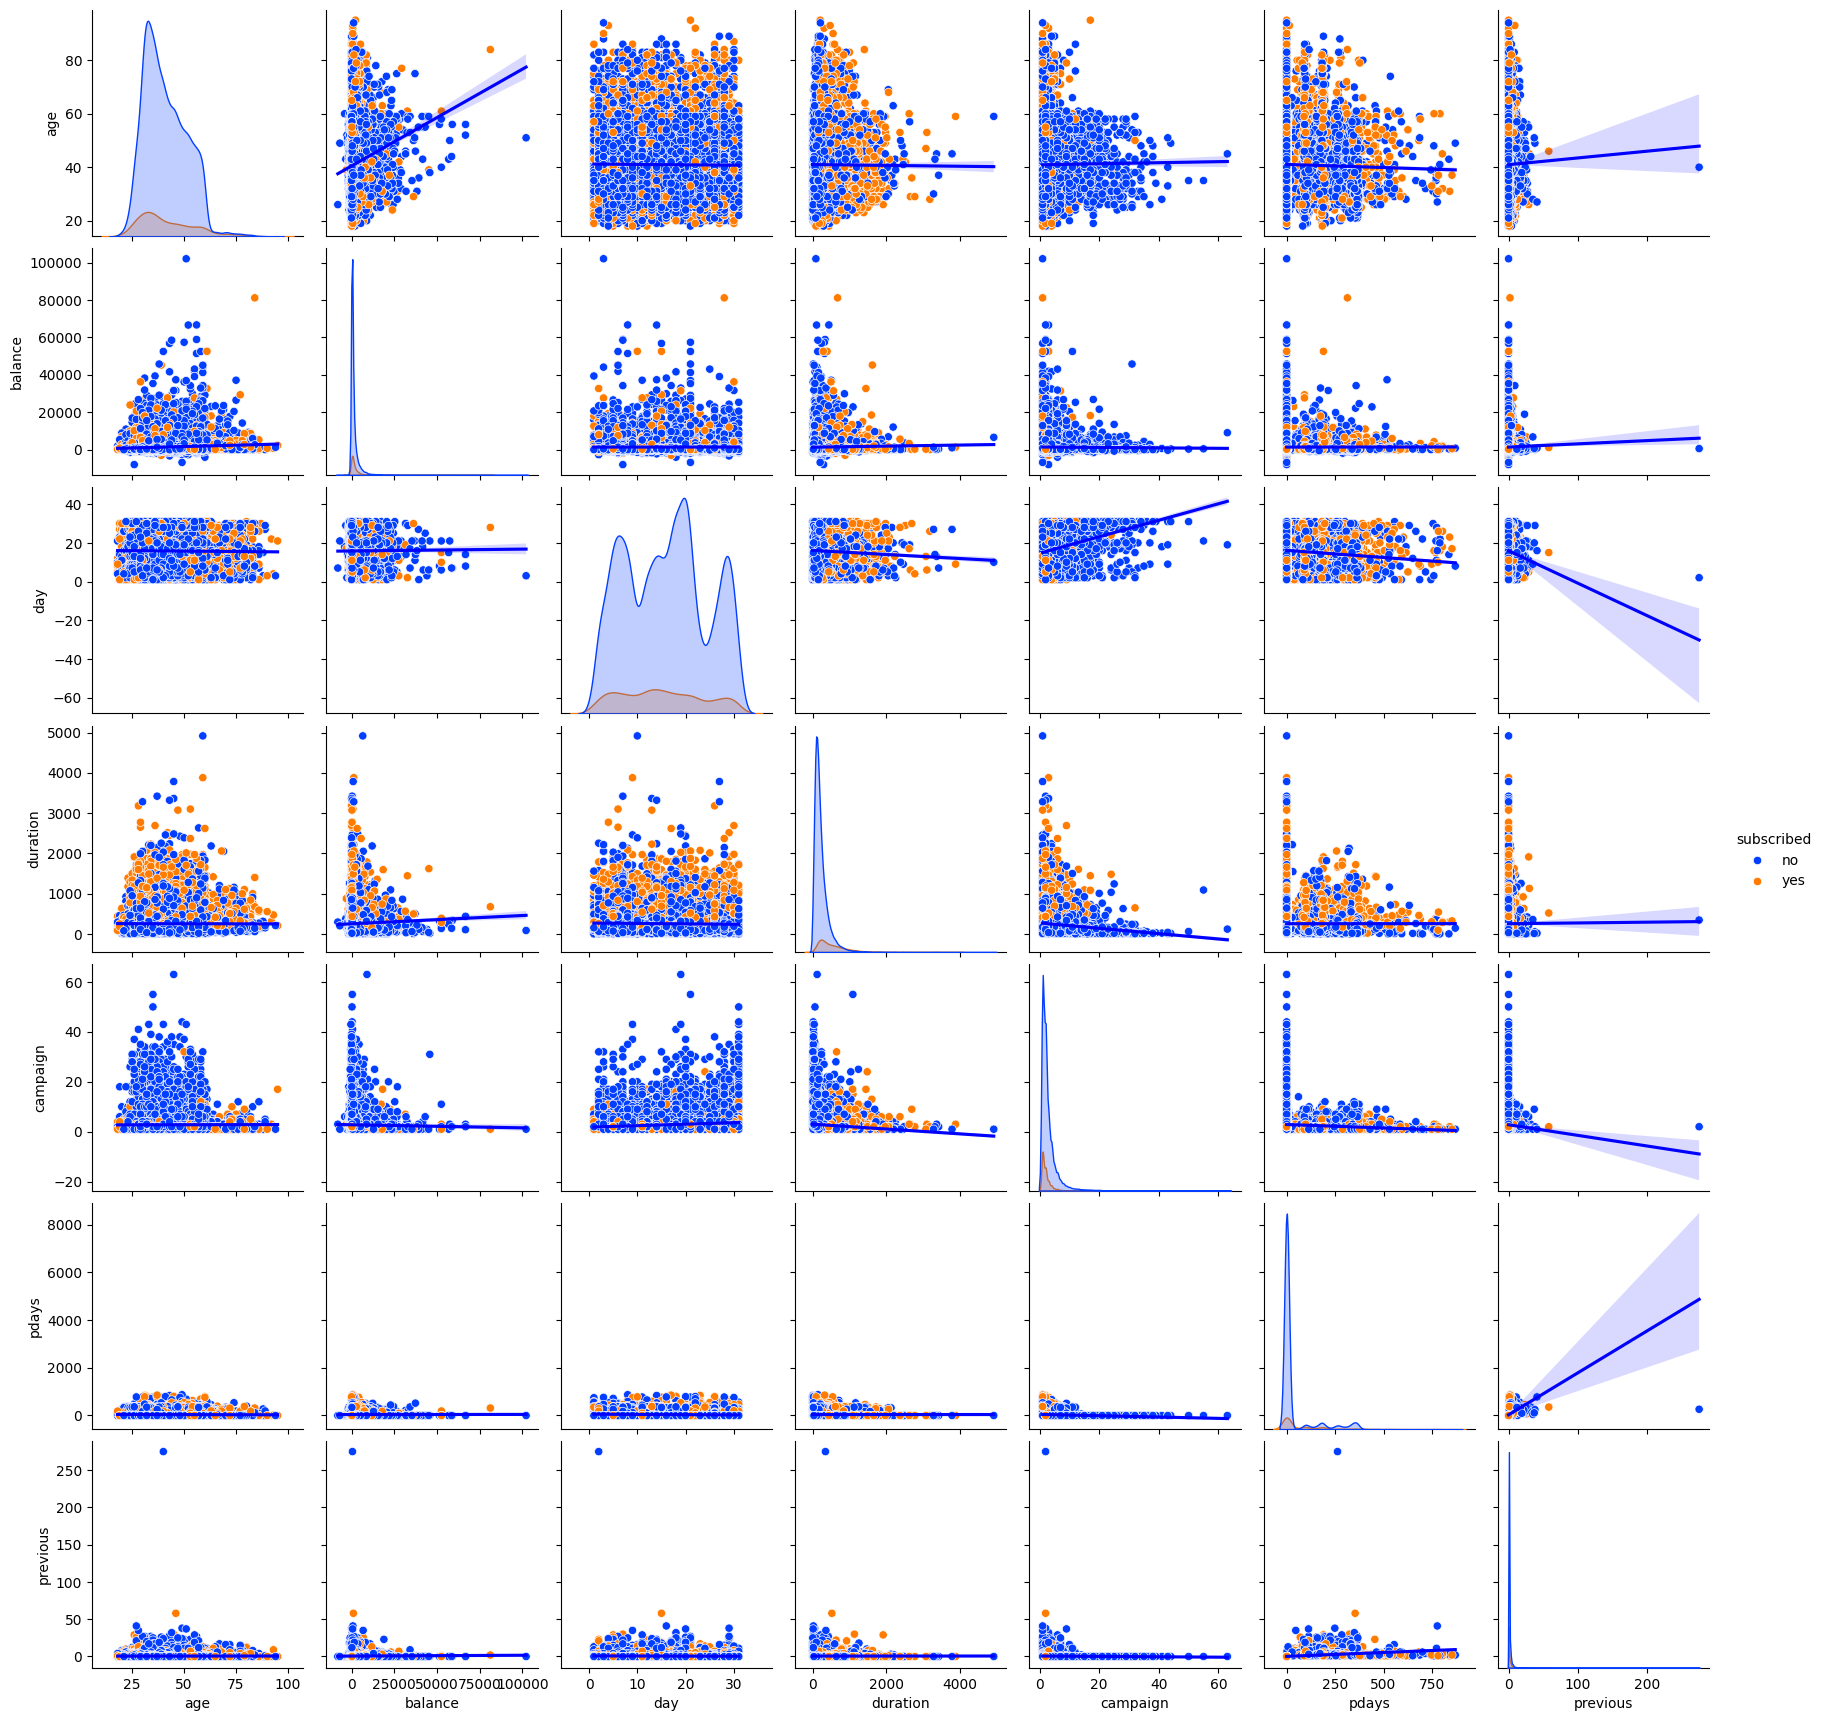

In [32]:
grid = sns.pairplot(train_df, hue = "subscribed", palette = "bright")

for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=train_df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

In [33]:
#ENCODING

train_df['subscribed'] = train_df['subscribed'].map({'yes': 1, 'no': 0})
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [34]:
#CORRELATION
cor = train_df[numerical_cols].corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


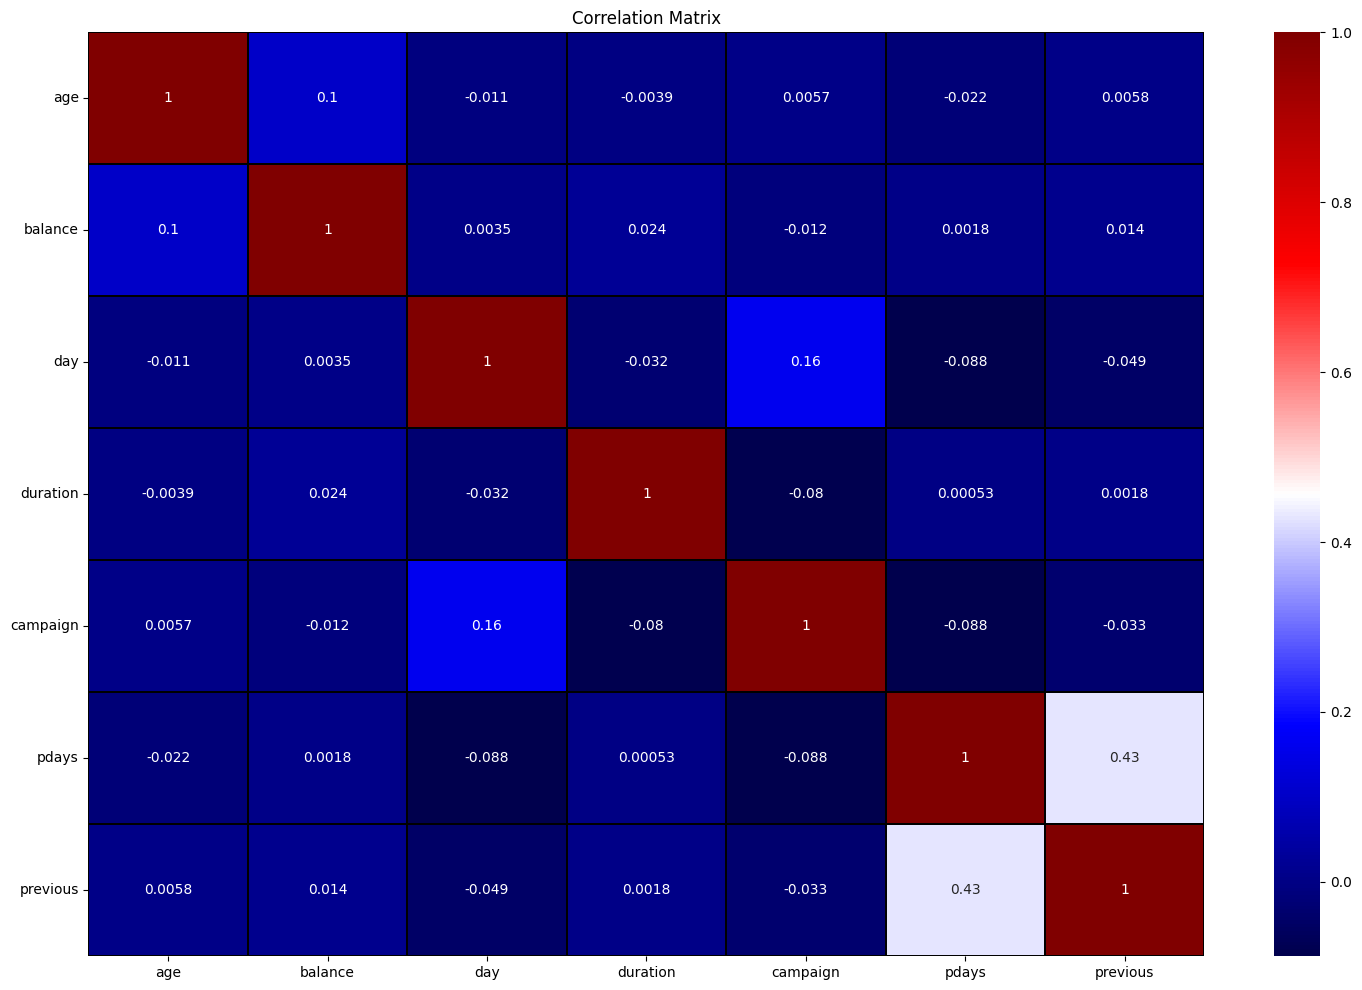

In [35]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2g", linecolor = 'black', cmap='seismic', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [36]:
train_df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [37]:
#ENCODING

for col in ['default', 'housing', 'loan']:
    train_df[col] = train_df[col].map({'yes': 1, 'no': 0})
    test_df[col] = test_df[col].map({'yes': 1, 'no': 0})

print("train dataset")
display(train_df.tail())

print("Test dataset")
display(test_df.head())

train dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,29,management,single,tertiary,0,0,1,0,cellular,12,may,116,2,-1,0,unknown,0
31643,53,management,divorced,tertiary,0,380,0,1,cellular,5,jun,438,2,-1,0,unknown,1
31644,32,management,single,tertiary,0,312,0,0,cellular,7,aug,37,3,-1,0,unknown,0
31645,57,technician,married,secondary,0,225,1,0,telephone,15,may,22,7,337,12,failure,0
31646,55,management,divorced,secondary,0,204,1,0,cellular,11,jul,1973,2,-1,0,unknown,1


Test dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,0,118,1,0,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,0,2787,0,0,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,0,144,1,0,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,0,3777,1,0,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,0,-705,0,1,unknown,3,jul,111,1,-1,0,unknown


In [38]:
# Encoding the other features using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in ['job', 'marital', 'education', 'contact', 'month', 'poutcome']:
    train_df[i] = OE.fit_transform(train_df[i].values.reshape(-1, 1))
    test_df[i] = OE.fit_transform(test_df[i].values.reshape(-1, 1))

print("train dataset")
display(train_df.head())

print("test dataset")
display(test_df.head())

train dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0,0


test dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0,118,1,0,0.0,15,8.0,20,6,-1,0,3.0
1,78,5.0,0.0,0.0,0,2787,0,0,1.0,1,5.0,372,1,-1,0,3.0
2,31,6.0,2.0,2.0,0,144,1,0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,0,3777,1,0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,0,-705,0,1,2.0,3,5.0,111,1,-1,0,3.0


In [39]:
#REMOVING OUTLIERS
from scipy.stats import zscore

z = np.abs(zscore(train_df))
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [40]:
# threshold = 3
df_new = train_df[(z<3).all(axis=1)]

print(f"{train_df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((train_df.shape[0] - df_new.shape[0]) / train_df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {train_df.shape[1]} columns.")
df_final = df_new.copy()
df_final

4063 rows with outliers were deleted.
This represent 12.84% of the data.
In the new dataset there are 27584 rows and 17 columns.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0,2968,0,0,2.0,20,6.0,30,4,-1,0,3.0,0
31641,37,9.0,2.0,2.0,0,1309,0,0,2.0,6,6.0,442,2,-1,0,3.0,0
31642,29,4.0,2.0,2.0,0,0,1,0,0.0,12,8.0,116,2,-1,0,3.0,0
31643,53,4.0,0.0,2.0,0,380,0,1,0.0,5,6.0,438,2,-1,0,3.0,1


In [41]:
# skewness
df_skew = df_final.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
previous,3.657231
pdays,2.799415
subscribed,2.624756
balance,2.433928
campaign,2.064222
loan,1.829242
duration,1.596175
contact,0.698882
age,0.439159
job,0.258302


In [42]:
# Subsetting the features with a skew > 0.5
df_skew[(df_skew['Skew'] > 0.5) | (df_skew['Skew'] < -0.5)]

,Skew
previous,3.657231
pdays,2.799415
subscribed,2.624756
balance,2.433928
campaign,2.064222
loan,1.829242
duration,1.596175
contact,0.698882
poutcome,-2.449518


In [43]:
# numerical columns
skew_cols = ['previous', 'pdays', 'balance', 'campaign', 'duration']
df_transformed = pd.DataFrame()

# Applying different transformations to skewed columns
for column in skew_cols:
    df_transformed[f"{column}_cbrt"] = df_final[column].apply(np.cbrt)
    df_transformed[f"{column}_log"] = df_final[column].apply(np.log)
    df_transformed[f"{column}_sqrt"] = df_final[column].apply(np.sqrt)

# Including the original skewed columns
df_transformed[skew_cols] = df_final[skew_cols]

# Display the transformed DataFrame
df_transformed.head()



,previous_cbrt,previous_log,previous_sqrt,pdays_cbrt,pdays_log,pdays_sqrt,balance_cbrt,balance_log,balance_sqrt,campaign_cbrt,campaign_log,campaign_sqrt,duration_cbrt,duration_log,duration_sqrt,previous,pdays,balance,campaign,duration
0,0.00000,-inf,0.000000,-1.000000,NaN,NaN,12.456918,7.566828,43.965896,1.259921,0.693147,1.414214,3.530348,3.784190,6.633250,0,-1,1933,2,44
1,0.00000,-inf,0.000000,-1.000000,NaN,NaN,1.442250,1.098612,1.732051,1.259921,0.693147,1.414214,4.497941,4.510860,9.539392,0,-1,3,2,91
2,0.00000,-inf,0.000000,-1.000000,NaN,NaN,9.622603,6.792344,29.849623,1.000000,0.000000,1.000000,6.214465,5.480639,15.491933,0,-1,891,1,240
3,1.44225,1.098612,1.732051,4.379519,4.430817,9.165151,14.868480,8.097731,57.332364,1.000000,0.000000,1.000000,9.535417,6.765039,29.444864,3,84,3287,1,867
4,0.00000,-inf,0.000000,-1.000000,NaN,NaN,4.918685,4.779123,10.908712,1.000000,0.000000,1.000000,7.243156,5.940171,19.493589,0,-1,119,1,380


In [44]:
df_transformed = pd.concat([df_transformed, df_final[skew_cols]], axis=1)

In [45]:
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")


,Skewness
previous_sqrt,2.535886
previous_log,NaN
previous_cbrt,2.275265
previous,3.657231
previous,3.657231
pdays_sqrt,-0.692272
pdays_log,-2.999089
pdays_cbrt,2.162491
pdays,2.799415
pdays,2.799415


In [46]:
# List of columns for cube root transformation
cbrt_cols = ['previous', 'balance', 'duration']
sqrt_cols = ['pdays']
log_cols = ['campaign']

# Apply cube root transformation
df_final[cbrt_cols] = df_final[cbrt_cols].apply(np.cbrt)
test_df[cbrt_cols] = test_df[cbrt_cols].apply(np.cbrt)

# Apply square root transformation
df_final[sqrt_cols] = df_final[sqrt_cols].apply(np.sqrt)
test_df[sqrt_cols] = test_df[sqrt_cols].apply(np.sqrt)

# Apply log transformation
df_final[log_cols] = df_final[log_cols].apply(np.log)
test_df[log_cols] = test_df[log_cols].apply(np.log)

# Display skewness after transformation
skewness_after_transform = df_final.skew().sort_values(ascending=False).to_frame(name="Skewness after transform")
skewness_after_transform


,Skewness after transform
subscribed,2.624756
previous,2.275265
loan,1.829242
contact,0.698882
campaign,0.598670
age,0.439159
duration,0.309191
job,0.258302
education,0.197092
day,0.075854


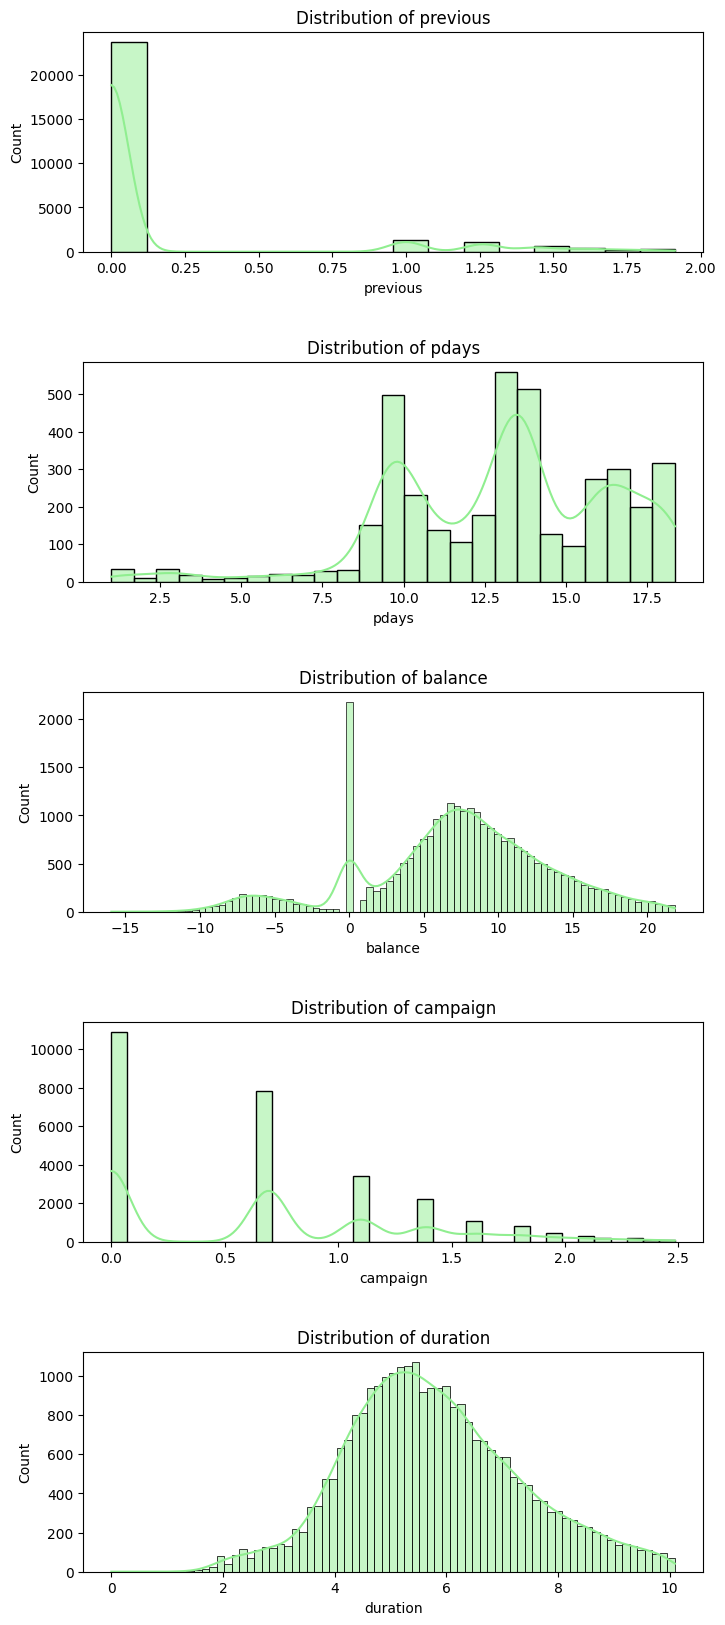

In [47]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(5, 1, figsize=(8, 20))
for ax, column in zip(axs.flat, skew_cols):
    sns.histplot(data=df_final, x=column, ax=ax, kde=True, color='lightgreen')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Standard scalarisation

In [48]:
# Separating features and label

x = df_final.drop('subscribed', axis=1)
y = df_final['subscribed']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (27584, 16)
Label Dimension = (27584,)


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling training data
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

# Scaling testing data
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

print(f"\n\n{'*'*30} dataset {'*'*30}")
display(x.head())

print(f"\n\n{'*'*30} Test dataset {'*'*30}")
# display(df_test.head())



****************************** dataset ******************************


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.519669,-1.322283,-0.279034,2.374747,0.0,0.846574,-1.109257,-0.440582,0.362292,0.375999,1.173570,-1.436312,0.042756,NaN,-0.396028,0.380591
1,-0.957582,2.021767,-0.279034,-0.302260,0.0,-0.969735,-1.109257,-0.440582,-0.734204,0.495243,-0.162960,-0.816578,0.042756,NaN,-0.396028,0.380591
2,-1.353942,0.805749,-0.279034,-0.302260,0.0,0.379198,0.901504,-0.440582,-0.734204,0.256756,-0.162960,0.282839,-1.025667,NaN,-0.396028,0.380591
3,1.618759,-0.106265,-1.932500,1.036243,0.0,1.244238,-1.109257,-0.440582,-0.734204,0.733730,0.171173,2.409876,-1.025667,-1.128943,2.714652,-0.757057
4,-0.957582,1.413758,-0.279034,-0.302260,0.0,-0.396474,0.901504,-0.440582,-0.734204,-1.412654,-0.831225,0.941706,-1.025667,NaN,-0.396028,0.380591




****************************** Test dataset ******************************


In [51]:
display(test_df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.388757,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-1.770139,1.522962,NaN,-0.458201,0.452163
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,1.009579,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.760054,-0.992527,NaN,-0.458201,0.452163
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.337414,0.893033,-0.429564,1.531969,0.031534,0.829938,1.655383,-0.992527,NaN,-0.458201,0.452163
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,1.238460,0.893033,-0.429564,0.413763,-0.330440,0.829938,-1.031965,-0.019403,NaN,-0.458201,0.452163
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-2.494370,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.588278,-0.992527,NaN,-0.458201,0.452163


In [52]:
missing_values = x.isnull().sum()
missing_values

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        23678
previous         0
poutcome         0
dtype: int64

In [53]:
# Dropping pdays from training and testing dataset
x.drop(['pdays'], axis=1, inplace=True)
test_df.drop(['pdays'], axis=1, inplace=True)

In [54]:
test_df.shape

(13564, 15)

In [55]:
# Finding varience inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
13,previous,5.906580
14,poutcome,5.893314
8,contact,1.328901
10,month,1.277455
0,age,1.272157
2,marital,1.231070
6,housing,1.173386
3,education,1.068298
12,campaign,1.058887
1,job,1.050085


In [56]:
#DATASET BALANCING

# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [57]:
target_counts = y1.value_counts()
target_counts

subscribed
0    24762
1    24762
Name: count, dtype: int64

In [58]:
X = x1
Y = y1

# MODELLING

best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_optimal_random_state(model, features, target, test_size=0.3, iterations=200):
    max_accuracy = 0
    optimal_random_state = 0

    for state in range(1, iterations):
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=state)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        current_accuracy = accuracy_score(y_test, predictions)

        if current_accuracy > max_accuracy:
            max_accuracy = current_accuracy
            optimal_random_state = state

    return optimal_random_state, max_accuracy


In [60]:
# Timing the execution
%%time

# Build the model
classifier = RandomForestClassifier()
best_state, best_accuracy = find_optimal_random_state(classifier, X, Y)
print(f"Best accuracy is {round(best_accuracy, 4)} at random state {best_state}")

Best accuracy is 0.9573 at random state 47
CPU times: user 16min 38s, sys: 910 ms, total: 16min 39s
Wall time: 16min 45s


In [61]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=best_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (34666, 15)
x_test shape:   (14858, 15)
y_train shape:  (34666,)
y_test shape:   (14858,)


In [62]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model_performance(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = model.score(x_train, y_train)

    print(f"\nModel: {model_name}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Training Accuracy for {model_name}: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy for {model_name}: {test_accuracy * 100:.2f}%")

    return test_accuracy, train_accuracy, y_pred

In [64]:
# Assuming you have defined the function evaluate_model_performance and necessary datasets (x_train, x_test, y_train, y_test)

# Assume models dictionary is defined as provided before
models = {'RandomForestClassifier' : RandomForestClassifier(),
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'BaggingClassifier': BaggingClassifier()}

# DataFrame to store results
df_model_accuracy = pd.DataFrame(columns=['id', 'Model', 'Training Accuracy', 'Test Accuracy Score'])




In [65]:
#RANDOM FOREST CLASSIFIER
import time
start_time = time.time()
id_model = 'RandomForestClassifier'
model = models[id_model]

# Assuming evaluate_model_performance is defined elsewhere and properly imported
acc, acc_train, pred = evaluate_model_performance(model, id_model, x_train, x_test, y_train, y_test)

# Converting model_metrics to DataFrame
model_metrics = pd.DataFrame([{'id': id_model, 'Model': str(model), 'Training Accuracy': acc_train, 'Model Accuracy Score': acc}])
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)

print("Execution Time: ", time.time() - start_time)
df_model_accuracy


Model: RandomForestClassifier
Confusion Matrix:
[[6990  398]
 [ 216 7254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7388
           1       0.95      0.97      0.96      7470

    accuracy                           0.96     14858
   macro avg       0.96      0.96      0.96     14858
weighted avg       0.96      0.96      0.96     14858

Training Accuracy for RandomForestClassifier: 100.00%
Test Accuracy for RandomForestClassifier: 95.87%
Execution Time:  5.9944422245025635


,id,Model,Training Accuracy,Test Accuracy Score,Model Accuracy Score
0,RandomForestClassifier,RandomForestClassifier(),1.0,NaN,0.958675


In [66]:
#Extra tree CLASSIFIER
import time
start_time = time.time()
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Assuming evaluate_model_performance is defined elsewhere and properly imported
acc, acc_train, pred = evaluate_model_performance(model, id_model, x_train, x_test, y_train, y_test)

# Converting model_metrics to DataFrame
model_metrics = pd.DataFrame([{'id': id_model, 'Model': str(model), 'Training Accuracy': acc_train, 'Model Accuracy Score': acc}])
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)

print("Execution Time: ", time.time() - start_time)
df_model_accuracy


Model: ExtraTreesClassifier
Confusion Matrix:
[[6967  421]
 [  77 7393]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      7388
           1       0.95      0.99      0.97      7470

    accuracy                           0.97     14858
   macro avg       0.97      0.97      0.97     14858
weighted avg       0.97      0.97      0.97     14858

Training Accuracy for ExtraTreesClassifier: 100.00%
Test Accuracy for ExtraTreesClassifier: 96.65%
Execution Time:  3.5595808029174805


,id,Model,Training Accuracy,Test Accuracy Score,Model Accuracy Score
0,RandomForestClassifier,RandomForestClassifier(),1.0,NaN,0.958675
1,ExtraTreesClassifier,ExtraTreesClassifier(),1.0,NaN,0.966483


In [67]:
#LogisticRegression
import time
start_time = time.time()
id_model = 'LogisticRegression'
model = models[id_model]

# Assuming evaluate_model_performance is defined elsewhere and properly imported
acc, acc_train, pred = evaluate_model_performance(model, id_model, x_train, x_test, y_train, y_test)

# Converting model_metrics to DataFrame
model_metrics = pd.DataFrame([{'id': id_model, 'Model': str(model), 'Training Accuracy': acc_train, 'Model Accuracy Score': acc}])
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)

print("Execution Time: ", time.time() - start_time)
df_model_accuracy


Model: LogisticRegression
Confusion Matrix:
[[6015 1373]
 [1323 6147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      7388
           1       0.82      0.82      0.82      7470

    accuracy                           0.82     14858
   macro avg       0.82      0.82      0.82     14858
weighted avg       0.82      0.82      0.82     14858

Training Accuracy for LogisticRegression: 81.52%
Test Accuracy for LogisticRegression: 81.85%
Execution Time:  0.09605550765991211


,id,Model,Training Accuracy,Test Accuracy Score,Model Accuracy Score
0,RandomForestClassifier,RandomForestClassifier(),1.00000,NaN,0.958675
1,ExtraTreesClassifier,ExtraTreesClassifier(),1.00000,NaN,0.966483
2,LogisticRegression,LogisticRegression(),0.81515,NaN,0.818549


In [68]:
#SVC
import time
start_time = time.time()
id_model = 'SVC'
model = models[id_model]

# Assuming evaluate_model_performance is defined elsewhere and properly imported
acc, acc_train, pred = evaluate_model_performance(model, id_model, x_train, x_test, y_train, y_test)

# Converting model_metrics to DataFrame
model_metrics = pd.DataFrame([{'id': id_model, 'Model': str(model), 'Training Accuracy': acc_train, 'Model Accuracy Score': acc}])
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)

print("Execution Time: ", time.time() - start_time)
df_model_accuracy


Model: SVC
Confusion Matrix:
[[6101 1287]
 [ 549 6921]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      7388
           1       0.84      0.93      0.88      7470

    accuracy                           0.88     14858
   macro avg       0.88      0.88      0.88     14858
weighted avg       0.88      0.88      0.88     14858

Training Accuracy for SVC: 88.06%
Test Accuracy for SVC: 87.64%
Execution Time:  64.0851137638092


,id,Model,Training Accuracy,Test Accuracy Score,Model Accuracy Score
0,RandomForestClassifier,RandomForestClassifier(),1.000000,NaN,0.958675
1,ExtraTreesClassifier,ExtraTreesClassifier(),1.000000,NaN,0.966483
2,LogisticRegression,LogisticRegression(),0.815150,NaN,0.818549
3,SVC,SVC(),0.880603,NaN,0.876430


In [69]:
#GradientBoostingClassifier
import time
start_time = time.time()
id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Assuming evaluate_model_performance is defined elsewhere and properly imported
acc, acc_train, pred = evaluate_model_performance(model, id_model, x_train, x_test, y_train, y_test)

# Converting model_metrics to DataFrame
model_metrics = pd.DataFrame([{'id': id_model, 'Model': str(model), 'Training Accuracy': acc_train, 'Model Accuracy Score': acc}])
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)

print("Execution Time: ", time.time() - start_time)
df_model_accuracy


Model: GradientBoostingClassifier
Confusion Matrix:
[[6620  768]
 [ 473 6997]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7388
           1       0.90      0.94      0.92      7470

    accuracy                           0.92     14858
   macro avg       0.92      0.92      0.92     14858
weighted avg       0.92      0.92      0.92     14858

Training Accuracy for GradientBoostingClassifier: 91.32%
Test Accuracy for GradientBoostingClassifier: 91.65%
Execution Time:  6.8105902671813965


,id,Model,Training Accuracy,Test Accuracy Score,Model Accuracy Score
0,RandomForestClassifier,RandomForestClassifier(),1.000000,NaN,0.958675
1,ExtraTreesClassifier,ExtraTreesClassifier(),1.000000,NaN,0.966483
2,LogisticRegression,LogisticRegression(),0.815150,NaN,0.818549
3,SVC,SVC(),0.880603,NaN,0.876430
4,GradientBoostingClassifier,GradientBoostingClassifier(),0.913171,NaN,0.916476


In [70]:
#AdaBoostClassifier
import time
start_time = time.time()
id_model = 'AdaBoostClassifier'
model = models[id_model]

# Assuming evaluate_model_performance is defined elsewhere and properly imported
acc, acc_train, pred = evaluate_model_performance(model, id_model, x_train, x_test, y_train, y_test)

# Converting model_metrics to DataFrame
model_metrics = pd.DataFrame([{'id': id_model, 'Model': str(model), 'Training Accuracy': acc_train, 'Model Accuracy Score': acc}])
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)

print("Execution Time: ", time.time() - start_time)
df_model_accuracy


Model: AdaBoostClassifier
Confusion Matrix:
[[6521  867]
 [ 829 6641]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7388
           1       0.88      0.89      0.89      7470

    accuracy                           0.89     14858
   macro avg       0.89      0.89      0.89     14858
weighted avg       0.89      0.89      0.89     14858

Training Accuracy for AdaBoostClassifier: 88.16%
Test Accuracy for AdaBoostClassifier: 88.59%
Execution Time:  2.5430803298950195


,id,Model,Training Accuracy,Test Accuracy Score,Model Accuracy Score
0,RandomForestClassifier,RandomForestClassifier(),1.000000,NaN,0.958675
1,ExtraTreesClassifier,ExtraTreesClassifier(),1.000000,NaN,0.966483
2,LogisticRegression,LogisticRegression(),0.815150,NaN,0.818549
3,SVC,SVC(),0.880603,NaN,0.876430
4,GradientBoostingClassifier,GradientBoostingClassifier(),0.913171,NaN,0.916476
5,AdaBoostClassifier,AdaBoostClassifier(),0.881584,NaN,0.885853


In [71]:
#BaggingClassifier
import time
start_time = time.time()
id_model = 'BaggingClassifier'
model = models[id_model]

# Assuming evaluate_model_performance is defined elsewhere and properly imported
acc, acc_train, pred = evaluate_model_performance(model, id_model, x_train, x_test, y_train, y_test)

# Converting model_metrics to DataFrame
model_metrics = pd.DataFrame([{'id': id_model, 'Model': str(model), 'Training Accuracy': acc_train, 'Model Accuracy Score': acc}])
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)

print("Execution Time: ", time.time() - start_time)
df_model_accuracy


Model: BaggingClassifier
Confusion Matrix:
[[6913  475]
 [ 449 7021]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7388
           1       0.94      0.94      0.94      7470

    accuracy                           0.94     14858
   macro avg       0.94      0.94      0.94     14858
weighted avg       0.94      0.94      0.94     14858

Training Accuracy for BaggingClassifier: 99.64%
Test Accuracy for BaggingClassifier: 93.78%
Execution Time:  1.9179627895355225


,id,Model,Training Accuracy,Test Accuracy Score,Model Accuracy Score
0,RandomForestClassifier,RandomForestClassifier(),1.000000,NaN,0.958675
1,ExtraTreesClassifier,ExtraTreesClassifier(),1.000000,NaN,0.966483
2,LogisticRegression,LogisticRegression(),0.815150,NaN,0.818549
3,SVC,SVC(),0.880603,NaN,0.876430
4,GradientBoostingClassifier,GradientBoostingClassifier(),0.913171,NaN,0.916476
5,AdaBoostClassifier,AdaBoostClassifier(),0.881584,NaN,0.885853
6,BaggingClassifier,BaggingClassifier(),0.996394,NaN,0.937811


In [72]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

,id,Model,Training Accuracy,Test Accuracy Score,Model Accuracy Score
1,ExtraTreesClassifier,ExtraTreesClassifier(),1.000000,NaN,0.966483
0,RandomForestClassifier,RandomForestClassifier(),1.000000,NaN,0.958675
6,BaggingClassifier,BaggingClassifier(),0.996394,NaN,0.937811
4,GradientBoostingClassifier,GradientBoostingClassifier(),0.913171,NaN,0.916476
5,AdaBoostClassifier,AdaBoostClassifier(),0.881584,NaN,0.885853
3,SVC,SVC(),0.880603,NaN,0.876430
2,LogisticRegression,LogisticRegression(),0.815150,NaN,0.818549


Cross val

In [73]:
best_state

47

In [74]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', 'entropy'],
             'random_state': [best_state, 10, 50, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model
model = ExtraTreesClassifier()

In [75]:
%%time

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

CPU times: user 19 s, sys: 3.86 s, total: 22.8 s
Wall time: 30min 48s


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [47, 10, 50, 1000]})

In [76]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
best_params

Best Parameters for ExtraTreesClassifier model:


{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 47}

In [77]:
best_model

ExtraTreesClassifier(max_depth=20, n_jobs=-2, random_state=47)

In [78]:
#Final model
best_model = ExtraTreesClassifier (criterion = 'gini', max_depth = 20, n_estimators = 100, n_jobs = -2, random_state = 47)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 94.18%


In [79]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

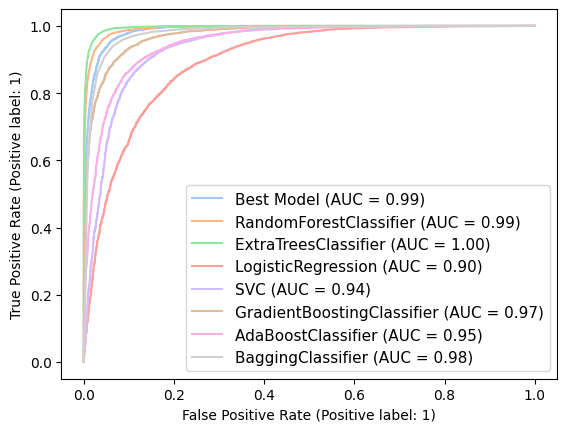

In [80]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(best_model, x_test, y_test, ax=ax, name='Best Model')

# Plot ROC curves for each model
for model_name, model in models.items():
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, name=model_name)
ax.legend(loc='lower right', prop={'size': 11})

# Display the plot
plt.show()


In [81]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "bank_marketing.pkl")

['bank_marketing.pkl']

In [82]:
model = joblib.load("bank_marketing.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 94.185 %


,0,1,2,3,4,5,6,7,8,9,...,14848,14849,14850,14851,14852,14853,14854,14855,14856,14857
Predicted,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,1,0,1,1,0
Original,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0


The best model is extra tree classifier with the accuracy  of 94.18%